In [1]:
import pickle
import pandas as pd
from msresist.pre_processing import MergeDfbyMean, FormatName, VFilter, preprocessing
from msresist.motifs import MapMotifs
from msresist.figures.figure1 import plotVarReplicates
from msresist.figures.figure3 import GenerateHyperGeomTestParameters
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [2]:
X = preprocessing(AXL_Das_DR=True, Vfilter=True, log2T=True, mc_row=False)
for i in range(X.shape[0]):
    X.iloc[i, 6:11] -= X.iloc[i, 6]
    X.iloc[i, 11:] -= X.iloc[i, 11]

In [3]:
with open("msresist/data/pickled_models/AXLmodel_PAM250_W2-5_5CL", "rb") as m:
    model = pickle.load(m)

axl_ms = preprocessing(AXLm_ErlAF154=True, Vfilter=True, FCfilter=True, log2T=True, mc_row=True)
axl_ms["Cluster"] = model.labels()

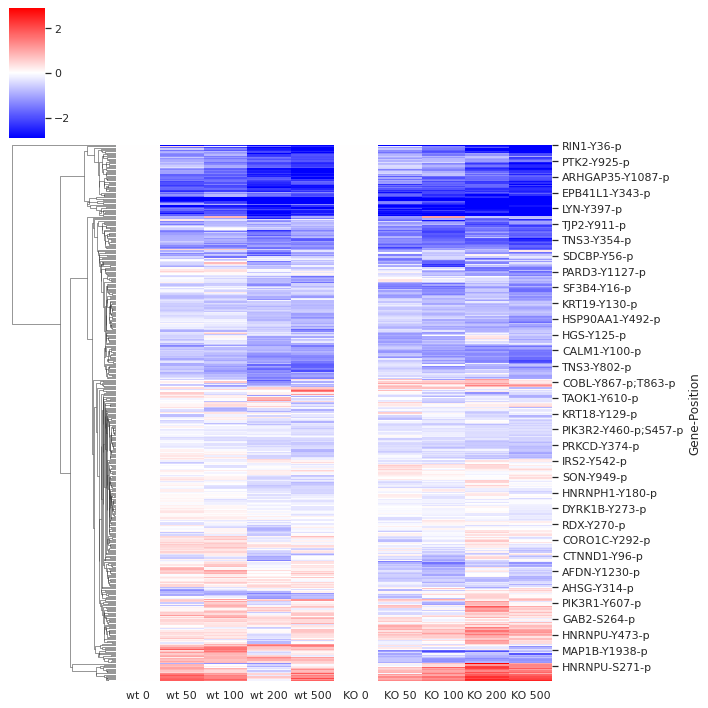

In [4]:
data = X.set_index(["Gene", "Position"]).select_dtypes(include=["float64"])
lim = np.max(abs(data.values)) * 0.5

g = sns.clustermap(data, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(10, 10), xticklabels=True, col_cluster=False)

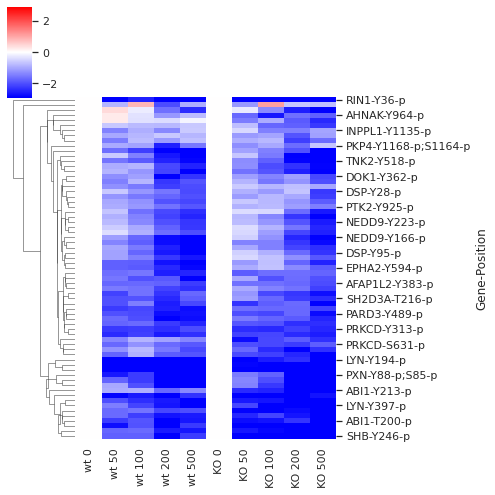

In [6]:
data_dr = X.iloc[g.dendrogram_row.reordered_ind[:67], :].set_index(["Gene", "Position"]).select_dtypes(include=["float64"])

lim = np.max(abs(data_dr.values)) * 0.5

g_dr = sns.clustermap(data_dr, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(7, 7), xticklabels=True, col_cluster=False)

In [7]:
dict(zip(X.iloc[g.dendrogram_row.reordered_ind[:67], 2].values, X.iloc[g.dendrogram_row.reordered_ind[:67], 3].values))

{'RIN1': 'Y36-p',
 'ABL1': 'Y393-p',
 'BCAR1': 'Y128-p',
 'PTK2B': 'Y573-p',
 'TNK2': 'T517-p',
 'CRKL': 'Y132-p;T130-p',
 'TLN1': 'Y127-p',
 'DOK1': 'Y362-p',
 'TNS3': 'Y855-p',
 'DSP': 'Y95-p',
 'GIT1': 'Y545-p',
 'PTK2': 'Y925-p',
 'PXN': 'Y88-p',
 'NEDD9': 'Y214-p',
 'EPHA2': 'Y594-p',
 'SH2D3A': 'T216-p',
 'ARHGAP35': 'Y1105-p',
 'STAT6': 'Y641-p',
 'AFAP1L2': 'Y383-p',
 'FRK': 'Y497-p',
 'ANXA1': 'Y207-p',
 'ARAP2': 'Y77-p',
 'PARD3': 'Y489-p',
 'TJP1': 'Y830-p',
 'PRKCD': 'S631-p',
 'EPB41L1': 'Y343-p',
 'CFL1': 'Y140-p',
 'SHANK2': 'Y610-p',
 'LYN': 'Y397-p',
 'YES1': 'Y222-p',
 'LCK': 'Y394-p',
 'ABI1': 'T200-p',
 'FYB1': 'Y571-p',
 'ACTN1': 'Y193-p',
 'ITSN2': 'Y553-p',
 'ACTN4': 'Y212-p',
 'SHB': 'Y246-p',
 'ANXA2': 'Y24-p',
 'CASKIN2': 'T370-p',
 'PKP4': 'Y1168-p;S1164-p',
 'AHNAK': 'Y964-p',
 'INPPL1': 'Y886-p',
 'DYRK1A': 'Y145-p',
 'TJP2': 'Y911-p'}

In [8]:
cl4 = pd.read_csv("msresist/data/cluster_members/CPTACmodel_Members_C4.csv")

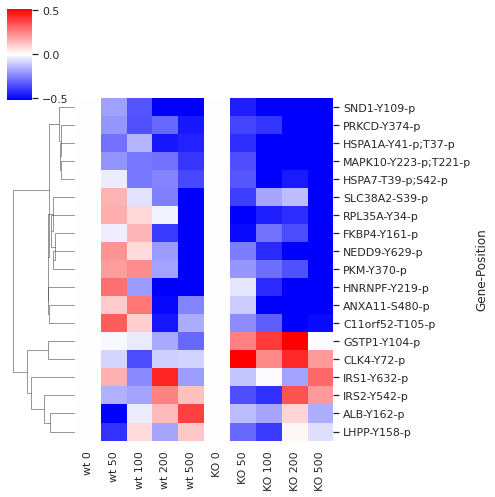

In [9]:
data_ud = X.iloc[g.dendrogram_row.reordered_ind[246:265], :].set_index(["Gene", "Position"]).select_dtypes(include=["float64"])

lim = np.max(abs(data_ud.values)) * 0.5

g_ud = sns.clustermap(data_ud, method="centroid", cmap="bwr", robust=True, vmax=lim, vmin=-lim, figsize=(7, 7), xticklabels=True, col_cluster=False)

In [11]:
GenerateHyperGeomTestParameters(axl_ms, X, list(data_dr.reset_index()["Gene"]), 2)

(13, 41, 49, 184)